<a href="https://colab.research.google.com/github/Kao19/Handwritten-digit-recognizer/blob/main/PFE_HANDWRITTEN_DIGITS_RECOGNIZER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1- AND Perceptron without using TensorFlow (Single Perceptron):**




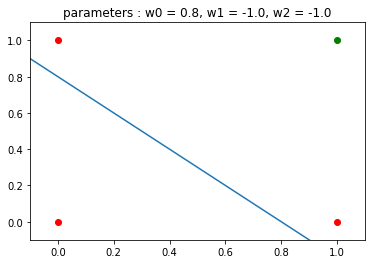

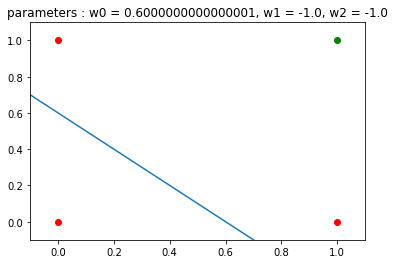

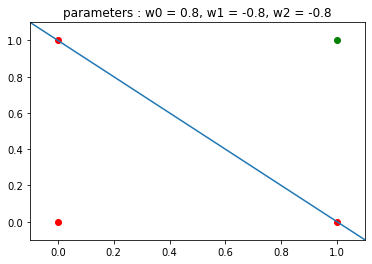

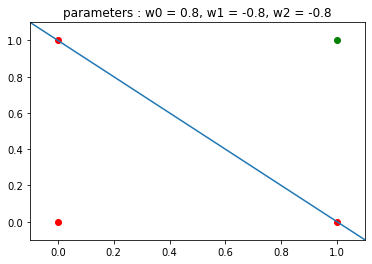

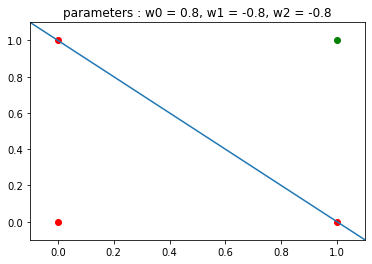

In [ ]:
# importing numpy library 
import numpy
from pylab import ylim, plot
from matplotlib import pyplot as plt

# define perceptron function
def perceptron(W, X):
  if numpy.dot(W, X) > 0:
    return 1
  else:
    return 0

#data visualation
def visualize(W, X):
  fig, ax = plt.subplots()
  X = numpy.arange(-0.2, 1.2, 0.1)
  ax.scatter(0, 0, color="r")
  ax.scatter(0, 1, color="r")
  ax.scatter(1, 0, color="r")
  ax.scatter(1, 1, color="g")
  ax.set_xlim([-0.1, 1.1])
  ax.set_ylim([-0.1, 1.1])
  m, c = -(W[1]/W[2]), -(W[0]/W[2])
  plt.title("parameters : w0 = {}, w1 = {}, w2 = {}".format(W[0], W[1], W[2]))
  ax.plot(X, m * X + c )
  plt.plot()

# define learn function
def learn(W,X,Y):
  visualize(W, X) 
  for i in range(Y.size):
    for j in range(W.size):
      W[j] = W[j] + 0.2*(Y[i] - perceptron(W,X[i]))*X[i,j]
    visualize(W, X)   

# Parameters
W = numpy.array([0.8, -1, -1]) # w0,w1 and w2 are initialized to 0.8, -1, -1

# learning data x0 x1 x2 y
X = numpy.array([[1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 0]])
Y= numpy.array([0, 1, 0, 0])

#call learn
learn(W,X,Y)

# **2- AND Perceptron with TensorFlow (Single Perceptron):**

> Bloc en retrait



In [ ]:
#importing librairies
import numpy as np
import tensorflow as tf
from pylab import ylim, plot
from matplotlib import pyplot as plt

#input set
x = np.array([[1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 0]])

#desired output
y = np.array([0, 1, 0, 0])

#weights
w = np.array([0.8, -1, -1])

#learning rate
n = 0.2

#learning process
print("0 - initial parameters are : w0 = {}, w1 = {}, w2 = {}".format(w[0], w[1], w[2]))
for i in range(len(y)):
        tmp = np.heaviside(tf.experimental.numpy.dot(x[i], w), 0)
        w += tf.subtract(y[i] - tmp , 0) * n * x[i]
        print(i+1,"- new parameters are: w0 = {}, w1 = {}, w2 = {}".format(w[0], w[1], w[2]))

0 - initial parameters are : w0 = 0.8, w1 = -1.0, w2 = -1.0
1 - new parameters are: w0 = 0.6000000000000001, w1 = -1.0, w2 = -1.0
2 - new parameters are: w0 = 0.8, w1 = -0.8, w2 = -0.8
3 - new parameters are: w0 = 0.8, w1 = -0.8, w2 = -0.8
4 - new parameters are: w0 = 0.8, w1 = -0.8, w2 = -0.8


# **3- XOR Multilayer Perceptron (MLP):**


The output: 
 [[0.]
 [1.]
 [1.]
 [0.]]

Hidden layer weights: 
 [[-11.985328 -10.025693]
 [-12.497817 -10.069266]]

Hidden layer biases: 
 [ 5.507648 14.776232]


[]

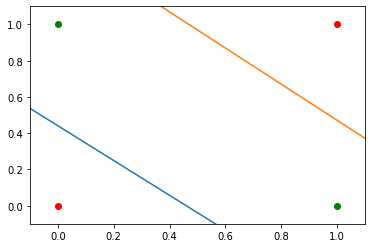

In [ ]:
#importing librairies
from tensorflow import keras
import numpy as np
from pylab import ylim, plot
from matplotlib import pyplot as plt

#inputs
xor_data = np.array([ [0,0], [0,1], [1,0], [1,1] ])

#outputs
desired_output = np.array([[0],[1],[1],[0]])

#creating the model
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation="sigmoid", input_shape=(2,))) #the hidden layer
model.add(keras.layers.Dense(1, activation="sigmoid")) #the output layer


#compile the model
model.compile(optimizer=keras.optimizers.Adam(lr=0.2) , loss="binary_crossentropy", metrics=['accuracy'])
model.fit(xor_data, desired_output, epochs=5000, verbose=0)

#print the output, the weights and biases
predict = model.predict(xor_data)
print("The output: \n", np.round(predict))
arr_weights = np.array(model.layers[0].get_weights()[0])
arr_bias = np.array(model.layers[0].get_weights()[1])
print('\nHidden layer weights: \n',arr_weights)
print('\nHidden layer biases: \n',arr_bias)

#datavisualation
figure, axis = plt.subplots()
X1 = np.arange(-0.2, 1.2, 0.1)
X2 = np.arange(-0.2, 1.2, 0.1)
axis.scatter(0, 0, color="r")
axis.scatter(0, 1, color="g")
axis.scatter(1, 0, color="g")
axis.scatter(1, 1, color="r")
axis.set_xlim([-0.1, 1.1])
axis.set_ylim([-0.1, 1.1])
m1, c1 = -(arr_weights[0][0]/arr_weights[1][0]), -(arr_bias[0]/arr_weights[1][0])
m2, c2 = -(arr_weights[0][1]/arr_weights[1][1]), -(arr_bias[1]/arr_weights[1][1])
plt.plot(X1, m1 * X1 + c1 )
plt.plot(X2, m2 * X2 + c2 )
plt.plot()





# **4- Handwritten Digit Recognizer (CNN):**


**Importing libraries**

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
from keras.utils import np_utils
from keras.models import load_model

**Loading the MNIST data**

In [ ]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

**Each image consists of 28 pixels.**

**Here is an example of how an image of a "5" from the data is represented:**

In [ ]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


**building** **the** **input** **vector** **from** **the** **28x28** **pixels**

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

**normalizing the data from values range of [0...255] to [0...1]**

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

**converting the target vectors to a numpy array**

In [ ]:
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

**building the sequential model**

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(28,28,1),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

**To better understand there is the summary and a digram of the model we created**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

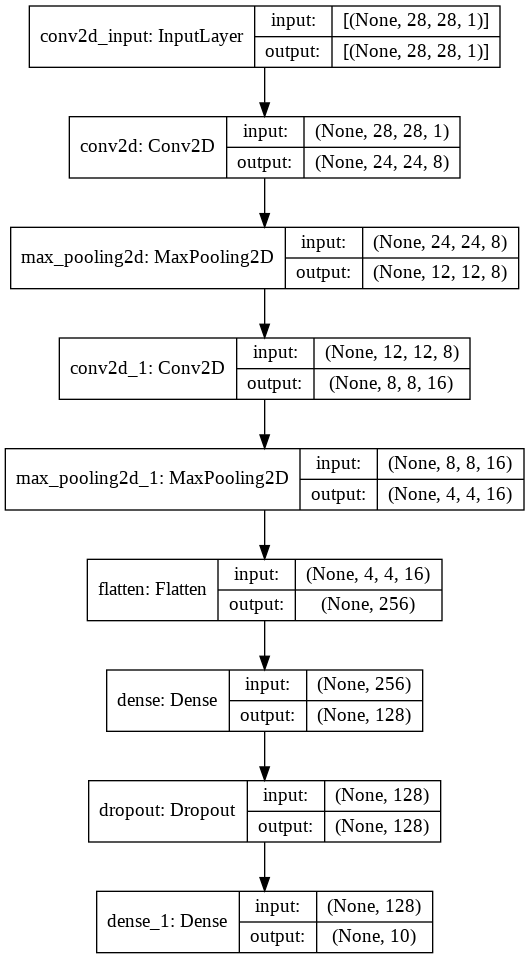

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

**Compiling and Training**

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(x_train, Y_train,
          batch_size=128, epochs=9,
          verbose=2,
          validation_data=(x_test, Y_test))

Epoch 1/9
469/469 - 18s - loss: 0.3219 - accuracy: 0.9028 - val_loss: 0.0813 - val_accuracy: 0.9744
Epoch 2/9
469/469 - 18s - loss: 0.0950 - accuracy: 0.9710 - val_loss: 0.0626 - val_accuracy: 0.9788
Epoch 3/9
469/469 - 18s - loss: 0.0698 - accuracy: 0.9788 - val_loss: 0.0451 - val_accuracy: 0.9867
Epoch 4/9
469/469 - 18s - loss: 0.0540 - accuracy: 0.9834 - val_loss: 0.0347 - val_accuracy: 0.9892
Epoch 5/9
469/469 - 18s - loss: 0.0473 - accuracy: 0.9855 - val_loss: 0.0368 - val_accuracy: 0.9885
Epoch 6/9
469/469 - 18s - loss: 0.0402 - accuracy: 0.9878 - val_loss: 0.0340 - val_accuracy: 0.9889
Epoch 7/9
469/469 - 18s - loss: 0.0343 - accuracy: 0.9896 - val_loss: 0.0299 - val_accuracy: 0.9906
Epoch 8/9
469/469 - 18s - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0325 - val_accuracy: 0.9892
Epoch 9/9
469/469 - 18s - loss: 0.0275 - accuracy: 0.9908 - val_loss: 0.0316 - val_accuracy: 0.9897


**Saving the model**

In [ ]:
model.save('mnist.h5')

**Evaluating the model**

In [ ]:
mnist_model = load_model('mnist.h5')
loss_and_metrics = mnist_model.evaluate(x_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 2s - loss: 0.0316 - accuracy: 0.9897
Test Loss 0.03158381208777428
Test Accuracy 0.9897000193595886


**Data visualisation**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



9871  classified correctly


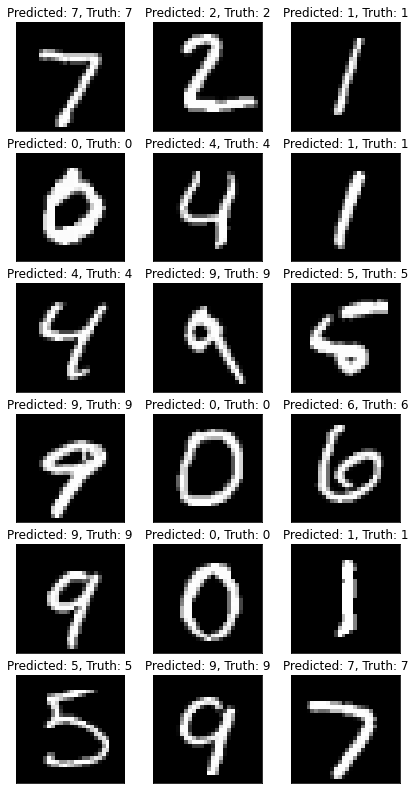

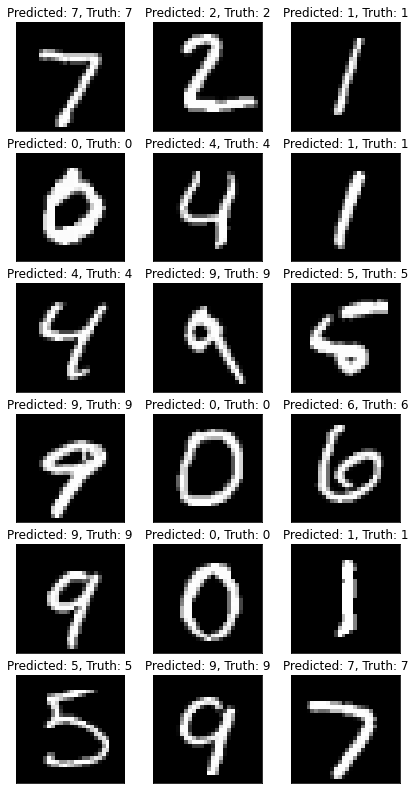

In [ ]:
#data visualisation
predicted_classes = mnist_model.predict_classes(x_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
print()
print(len(correct_indices)," classified correctly")

plt.rcParams['figure.figsize'] = (7,14)
figure_evaluation = plt.figure()

# plot 18 correct predictions
for i, correct in enumerate(correct_indices[:18]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

**Visualizing accuracy and loss**


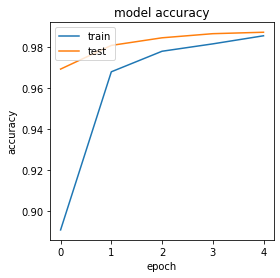

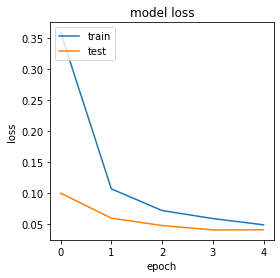

In [ ]:
# summarize history for accuracy
plt.figure(figsize=(4, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(4, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Visualizing a confusion matrix**

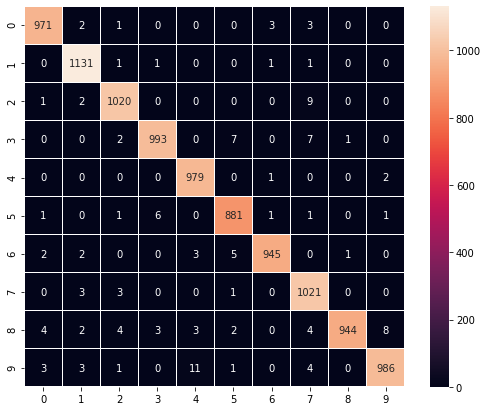

In [ ]:
predictionss = model.predict([x_test])
predictions = np.argmax(predictionss, axis=1)
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**The learning rate**

In [ ]:
import keras.backend as K
print(K.eval(model.optimizer.lr))

0.001


# **5- GUI for the CNN model**

In [ ]:
!pip install -q gradio

In [ ]:
import gradio as gr

mnist_model = load_model('mnist.h5')

test=x_test[0].reshape(-1,28,28,1)
pred=mnist_model.predict(test)
print(pred)


#prepare the images
def predict_image(img):
  img_3d=img.reshape(-1,28,28,1)
  im_resize=img_3d/255.0
  prediction=mnist_model.predict(im_resize)
  pred=np.argmax(prediction)
  return pred

#creating the GUI
iface = gr.Interface(predict_image, inputs="sketchpad", outputs="label")

#launching the GUI
iface.launch(debug='True')

[[2.2920446e-09 6.0998694e-08 1.6850272e-08 2.2433233e-06 4.9428545e-10
  4.2779350e-11 4.7714980e-15 9.9999619e-01 3.9509701e-10 1.4154537e-06]]
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://29845.gradio.app
Interface loading below...


KeyboardInterrupt: ignored